<a href="https://colab.research.google.com/github/SHAIK-RAIYAN-2022-CSE/KARE/blob/main/Exp1_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

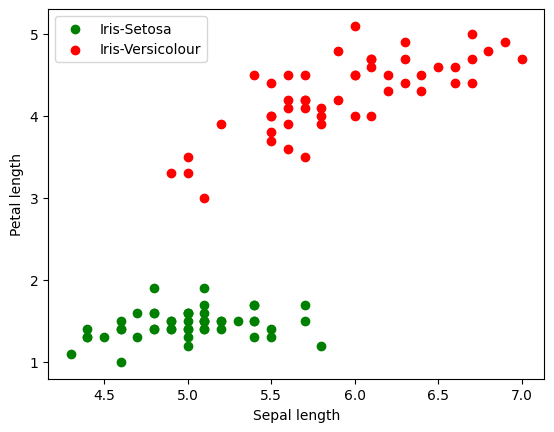

Epoch 1/15, Error: 0.5
Weights: [22.68034682 10.07074734 16.82232067  4.66525176], Bias: -3.0
Epoch 2/15, Error: 0.5
Weights: [ 2.73034682 -3.54925266 10.99232067  3.67525176], Bias: 1.0
Epoch 3/15, Error: 0.5
Weights: [-17.21965318 -17.16925266   5.16232067   2.68525176], Bias: 5.0
Epoch 4/15, Error: 0.5
Weights: [ 6.54034682 -6.03925266 22.11232067  8.02525176], Bias: 1.0
Epoch 5/15, Error: 0.5
Weights: [-13.40965318 -19.65925266  16.28232067   7.03525176], Bias: 5.0
Epoch 6/15, Error: 0.5
Weights: [10.35034682 -8.52925266 33.23232067 12.37525176], Bias: 1.0
Epoch 7/15, Error: 0.5
Weights: [ -9.59965318 -22.14925266  27.40232067  11.38525176], Bias: 5.0
Epoch 8/15, Error: 0.0375
Weights: [ -7.95965318 -21.34925266  28.41232067  11.72525176], Bias: 4.7
Epoch 9/15, Error: 0.0
Weights: [ -7.95965318 -21.34925266  28.41232067  11.72525176], Bias: 4.7
Epoch 10/15, Error: 0.0
Weights: [ -7.95965318 -21.34925266  28.41232067  11.72525176], Bias: 4.7
Epoch 11/15, Error: 0.0
Weights: [ -7.959

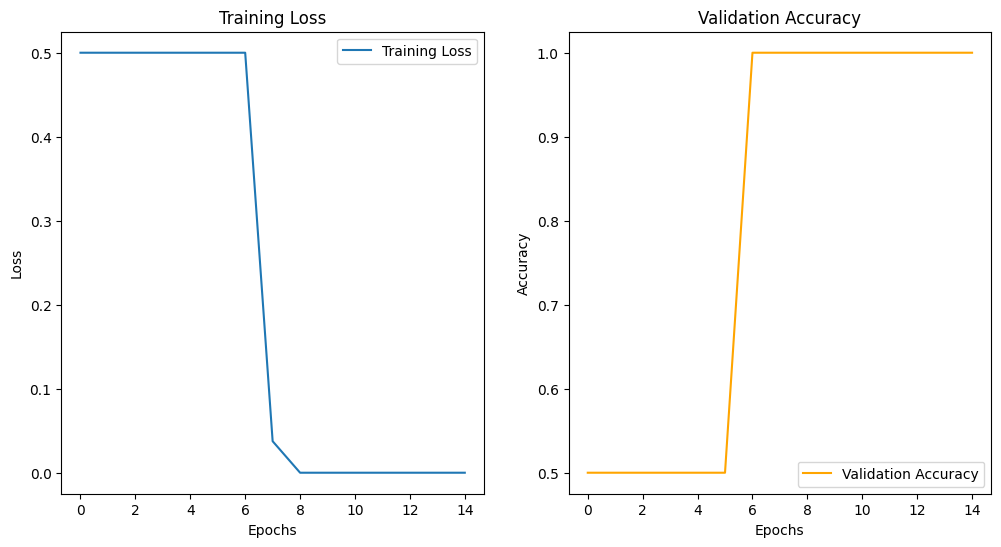

In [7]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Constants
SEED = 2017
LEARNING_RATE = 0.1
N_EPOCHS = 15

# Load the Iris dataset
iris = load_iris()
idxs = np.where(iris.target < 2)
X = iris.data[idxs]
y = iris.target[idxs]

# Plot the data for two of the four variables
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 2], color='green', label='Iris-Setosa')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 2], color='red', label='Iris-Versicolour')
plt.xlabel('Sepal length')
plt.ylabel('Petal length')
plt.legend()
plt.show()

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=SEED)

# Initialize weights and bias
weights = np.random.normal(size=X_train.shape[1])
bias = 1

# Initialize hyperparameters and tracking lists
hist_loss = []
hist_accuracy = []

# Training loop
for epoch in range(N_EPOCHS):
    # Apply the activation function
    output = np.where((X_train.dot(weights) + bias) > 0.5, 1, 0)

    # Compute Mean Squared Error (MSE)
    error = np.mean((y_train - output) ** 2)
    print(f"Epoch {epoch + 1}/{N_EPOCHS}, Error: {error}")

    # Update weights and bias
    weights -= LEARNING_RATE * np.dot((output - y_train), X_train)
    bias += LEARNING_RATE * np.sum(output - y_train)
    print(f"Weights: {weights}, Bias: {bias}")

    # Track training loss
    loss = np.mean((output - y_train) ** 2)
    hist_loss.append(loss)

    # Validation accuracy
    output_val = np.where(X_val.dot(weights) + bias > 0.5, 1, 0)
    accuracy = np.mean(output_val == y_val)
    hist_accuracy.append(accuracy)

# Plot training loss and validation accuracy
fig = plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(hist_loss, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(hist_accuracy, label='Validation Accuracy', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy')
plt.legend()

plt.show()
